# Day 7: Physical (Ditribution) - Ultraviolet Catastrophe

Source: https://liu-group.github.io/interactive-ultraviolet/

## Cargar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import altair as alt
import scipy

## Fórmula

$$\rho(\nu, T)_{\mathrm{Planck}} = \dfrac{8\pi h \nu^{3}}{ c^{3} \left( e^{\frac{h\nu}{k_{B} T}} - 1 \right)}$$

In [2]:
def rho_planck(nu,T):
    h = scipy.constants.h
    c = scipy.constants.speed_of_light
    kB = scipy.constants.Boltzmann
    numerator = 8 * np.pi * h * (nu**3)
    denominator = (c**3) * ( np.exp( (h * nu)/(kB*T) ) - 1 )
    rho = numerator/denominator
    return rho

## Crear conjunto de datos

In [3]:
# Definimos lista de temperaturas
arr_temperatures = np.arange(500,1200,150)

# Definimos el rango de nu
arr_nu = np.logspace(np.log10(1e12), np.log10(1e15), num=1000, endpoint=True)

# Iteramos por temperaturas para crear y concatenar dataframes
list_dfs = []
for temperature in arr_temperatures:
    data = dict()
    data['nu'] = arr_nu
    data['Temperature'] = [temperature]*len(arr_nu)
    data['rho_Planck'] = rho_planck(nu = arr_nu, T= temperature)
    data_frame = pd.DataFrame(data=data)
    # Guardar data frame en la lista de dfs
    list_dfs.append(data_frame)
# Concatenar
df = pd.concat(list_dfs).reset_index(drop=True)

## Visualizar datos

Vamos a tratar a las temperaturas como un objeto categórico

In [4]:
df['Temperature'] = df['Temperature'].astype('category')

### Colour palette

Durante el mismo tiempon en que hace este descubrimiento y desarollo en la física, existió una corriente artística llamada **Neo-Plasticismo**. Uno de los más grandes expositores fue **Piet Mondrian** con **De Stijl**. Así que vamos a adecuar la gráfica a el arte de ese tiempo con la paleta de colores.

Como son 5 temperaturas, vamos a adaptar un poco los colores primarios, agregando un amarillo _verdoso_ y un naranja _intenso_ para no alejarnos de los colores primarios.

<img src="https://artmiamimagazine.com/wp-content/uploads/2020/06/piet-mondrian-8a0b31.jpg" width=800px>

In [5]:
colour_palette = ['#125BBB', '#C3DA11', '#FFE605', '#E66E04', '#D51B1B']

### Matplotlib + Seaborn

In [6]:
plt.rc('font', family='Palatino')

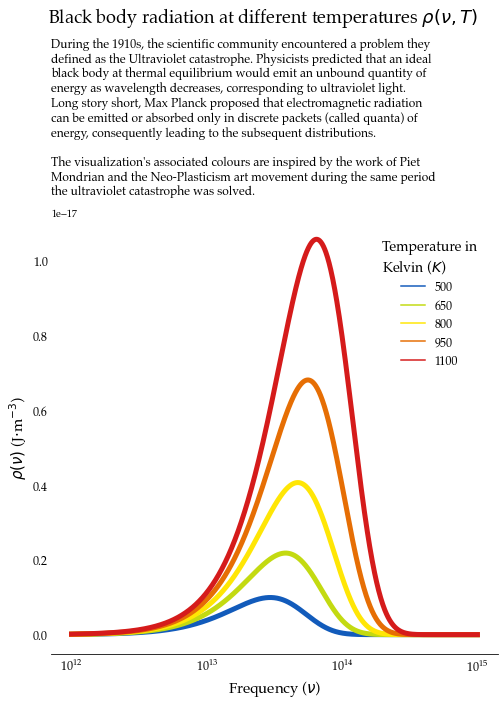

In [7]:
fig, ax = plt.subplots(figsize=(8,8),facecolor='white')
ax.set_facecolor('white')

sns.lineplot(data=df, x='nu', y='rho_Planck',
             hue= 'Temperature', palette=colour_palette,
             linewidth=5, 
             ax=ax)

ax.set_xlabel(r'Frequency ($\nu$)', size=15)
ax.set_ylabel(r'$\rho(\nu)$ (J$\cdot$m$^{-3}$)', size=15)
fig.suptitle(r"Black body radiation at different temperatures $\rho(\nu, T)$",
             y = 1.25, x = 0.12, ha='left',
             size=18)
ax.set_title("During the 1910s, the scientific community encountered a problem they\ndefined as the Ultraviolet catastrophe. Physicists predicted that an ideal\nblack body at thermal equilibrium would emit an unbound quantity of\nenergy as wavelength decreases, corresponding to ultraviolet light.\nLong story short, Max Planck proposed that electromagnetic radiation\ncan be emitted or absorbed only in discrete packets (called quanta) of\nenergy, consequently leading to the subsequent distributions.\n\nThe visualization's associated colours are inspired by the work of Piet\nMondrian and the Neo-Plasticism art movement during the same period\nthe ultraviolet catastrophe was solved.",
             loc='left', pad=25)

ax.set_xscale('log')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(False)
ax.tick_params(which = 'both', length=0)
ax.tick_params(labelsize=12)

ax.legend(loc=(0.73,0.65),
          title = 'Temperature in\nKelvin ($K$)', title_fontsize = 14,
          fontsize=12,
          ncol = 1, edgecolor='white', framealpha=0)


plt.show()